<a href="https://colab.research.google.com/github/santihm/Multi-LabelClassificationProteinFunctions/blob/main/Pr%C3%A1ctica_Opcional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Automático - Práctica Optativa - Clasificación multi-etiqueta de funciones de proteínas - Pedro Luis Abril Ortega, Isaac Brao Aissaoni, Emilio Gullón López y Santiago Herron Mulet

## Introducción

La clasificación de proteínas es un desafío fundamental en el campo de la biología computacional y la bioinformática. Las proteínas son macromoléculas esenciales para la vida y desempeñan una amplia variedad de funciones en los organismos vivos, desde la catálisis de reacciones bioquímicas hasta el transporte de moléculas. Comprender la función de una proteína puede proporcionar información crucial sobre los procesos biológicos y facilitar el desarrollo de nuevos medicamentos y terapias.

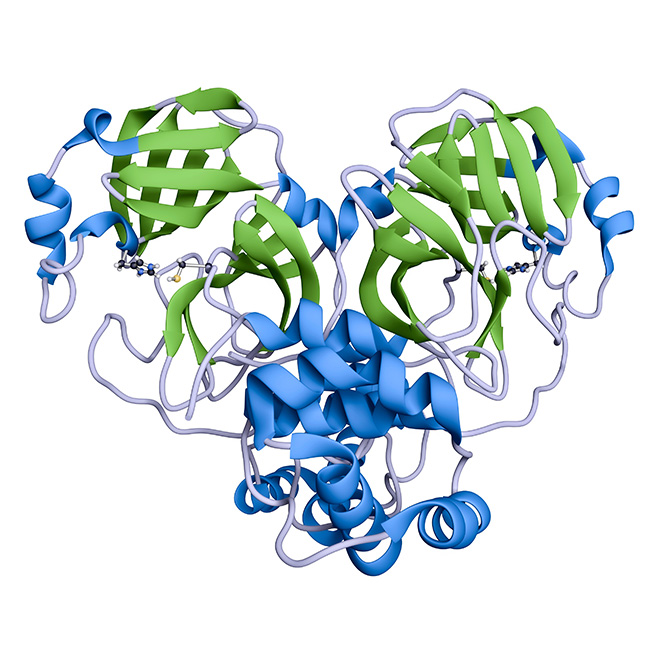

En este contexto, el problema de clasificación multi-etiqueta de funciones de proteínas se presenta como una tarea compleja y desafiante. A diferencia de la clasificación tradicional, donde cada instancia pertenece a una única clase, en la clasificación multi-etiqueta, cada proteína puede estar asociada con múltiples funciones. Esto refleja la realidad biológica, ya que una proteína puede desempeñar más de un papel en la célula.

## Importancia del Problema

La capacidad de predecir las funciones de las proteínas de manera precisa tiene un impacto significativo en diversas áreas de la biología y la medicina:
- **Investigación Biomédica**: Identificar funciones proteicas es crucial para entender las bases moleculares de las enfermedades.
- **Desarrollo de Medicamentos**: Conocer las funciones de las proteínas puede acelerar el diseño de fármacos específicos.
- **Biotecnología**: Permite la ingeniería de proteínas con funciones deseadas para aplicaciones industriales y ambientales.

El dataset **GenBase** que utilizaremos en esta práctica contiene información sobre proteínas y sus respectivas funciones. Este dataset es pequeño en comparación con otros conjuntos de datos, con 662 ejemplos y 1186 etiquetas binarias, pero es representativo de la complejidad inherente a los problemas de clasificación multi-etiqueta en biología.

## Características del Problema

Algunas características destacadas de este problema incluyen:
- **Alta Dimensionalidad**: Con 1186 etiquetas, la dimensionalidad de las etiquetas es alta en comparación con el número de ejemplos.
- **Naturaleza Multi-Etiqueta**: Cada instancia puede estar etiquetada con una o varias de las 27 clases, lo que introduce complejidad adicional en el modelo de clasificación.
- **Imbalance de Etiquetas**: Es probable que algunas etiquetas sean más frecuentes que otras, lo que puede afectar el rendimiento del modelo.
- **Correlación entre Etiquetas**: Las funciones de las proteínas no son mutuamente exclusivas, y es posible que algunas funciones estén correlacionadas entre sí.

## Complejidad del Problema

El problema de clasificación multi-etiqueta es inherentemente más complejo que la clasificación de una sola etiqueta debido a varios factores:
- **Predicción Conjunta de Etiquetas**: Los modelos deben ser capaces de predecir un conjunto de etiquetas simultáneamente, en lugar de una sola etiqueta.
- **Relaciones entre Etiquetas**: La presencia de ciertas etiquetas puede influir en la probabilidad de otras, lo que requiere que los modelos consideren estas relaciones.
- **Evaluación Compleja**: Las métricas de evaluación estándar no son suficientes; se necesitan métricas especializadas como Hamming Loss, Precision, Recall y F1-Score para evaluar el rendimiento de los modelos multi-etiqueta.

## Objetivos de la Práctica

En esta práctica, abordaremos el problema de clasificación multi-etiqueta de funciones de proteínas utilizando el dataset GenBase. Los objetivos específicos son:
1. **Cargar y Explorar los Datos**: Comprender la estructura y distribución de los datos.
2. **Preprocesar los Datos**: Preparar los datos para su uso en modelos de aprendizaje automático.
3. **Entrenar Modelos**: Implementar y entrenar varios modelos de clasificación multi-etiqueta.
4. **Evaluar Modelos**: Utilizar métricas adecuadas para evaluar el rendimiento de los modelos.


## 1.Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.

### Estructura de los datos
Cada instancia del problema se trata de una proteína, esta la podemos mapear en una representación basada en atributos.

Cada proteína puede ser representada mediante un patrón binario de N bits, donde N es el número de motivos en un vocabulario específico de secuencias de motivos. Estos motivos son secuencias cortas de aminoácidos comúnmente encontradas en proteínas. La representación binaria de la proteína codifica la presencia o ausencia de cada uno de estos motivos:

Un bit activo (1) indica que el motivo correspondiente está presente en la secuencia de aminoácidos, mientras que un bit inactivo (0) indica que está ausente.

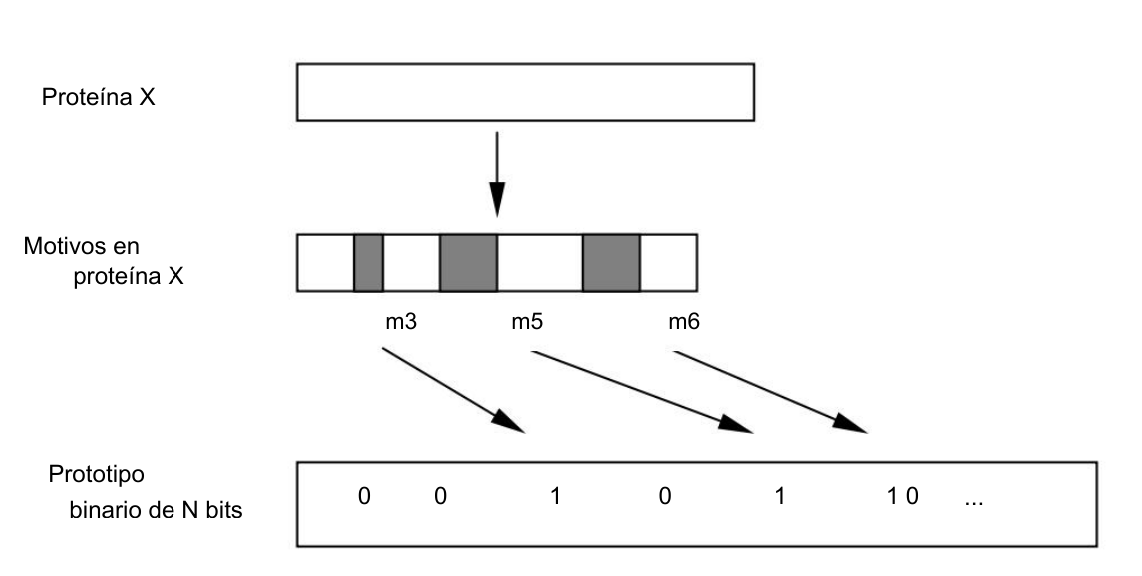


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Extración
Cargamos los datos. Los datos vienen en formato .arrf y los datos ya vienen serparados en:
+ **genbase_train** (conjunto de entrenamiento) y **genbase_test** (conjunto de testing).
+ También tenemos **genbase** que se trata de todo el conjunto de datos.

Podemos observar los tamaños de los conjuntos de datos:

| Conjunto |Nº de instancias | Nº de parámetros | Porcentaje |
| ----------- | ----------- | ----------- |----------- |
| genbase | 662 | 1213| 70%
| genbase_train | 463 | 1213| 30%
| genbase_test | 199 | 1213| 100%


In [ ]:
import pandas as pd
from scipy.io import arff

# Ruta a la carpeta donde se encuentran los archivos
data_folder = 'drive/MyDrive/Colab Notebooks/datos/'

# Cargar archivos ARFF
def load_arff(file_path):
    data = arff.loadarff(file_path)
    df = pd.DataFrame(data[0])
    return df

genbase = load_arff(data_folder + 'genbase.arff')
genbase_train = load_arff(data_folder + 'genbase-train.arff')
genbase_test = load_arff(data_folder + 'genbase-test.arff')

# Mostrar tamaño
print(genbase.shape)
print(genbase_train.shape)
print(genbase_test.shape)

(662, 1213)
(463, 1213)
(199, 1213)


In [ ]:
# Mostrar las primeras filas de cada dataset
print("Genbase Dataset:")
print(genbase.head())
print("\nGenbase Train Dataset:")
print(genbase_train.head())
print("\nGenbase Test Dataset:")
print(genbase_test.head())

Genbase Dataset:
     protein PS00010 PS00011 PS00012 PS00014 PS00017 PS00018 PS00019 PS00020  \
0  b'O00060'   b'NO'   b'NO'   b'NO'   b'NO'   b'NO'   b'NO'   b'NO'   b'NO'   
1  b'O00139'   b'NO'   b'NO'   b'NO'   b'NO'  b'YES'   b'NO'   b'NO'   b'NO'   
2  b'O02741'   b'NO'   b'NO'   b'NO'   b'NO'   b'NO'   b'NO'   b'NO'   b'NO'   
3  b'O08424'   b'NO'   b'NO'   b'NO'   b'NO'   b'NO'   b'NO'   b'NO'   b'NO'   
4  b'O12984'   b'NO'   b'NO'   b'NO'   b'NO'   b'NO'   b'NO'   b'NO'   b'NO'   

  PS00021  ... PDOC00662 PDOC00018 PDOC50001 PDOC00014 PDOC00750 PDOC50196  \
0   b'NO'  ...      b'0'      b'0'      b'0'      b'0'      b'0'      b'0'   
1   b'NO'  ...      b'0'      b'0'      b'0'      b'0'      b'0'      b'0'   
2   b'NO'  ...      b'0'      b'0'      b'0'      b'0'      b'0'      b'0'   
3   b'NO'  ...      b'0'      b'0'      b'0'      b'0'      b'0'      b'0'   
4   b'NO'  ...      b'0'      b'0'      b'0'      b'0'      b'0'      b'0'   

  PDOC50199 PDOC00660 PDOC00653 P

#### Definición de parámetros (X) y etiquetas (y)
En la parte superior, podemos observar el formato de los datos de los diferentes conjuntos.

La primera columna de los datos corresponde al nombre de la proteína, un parámetro que no es necesario y por lo tanto se elimina.

A continuación, procedemos a extraer los atributos (X) y las etiquetas (y) con las que trabajaremos.

Las 27 últimas columnas indican la clase de cada instancia, mientras que las columnas restantes representan sus atributos. Un valor "sí" indica la presencia del atributo y "no" indica su ausencia.

In [ ]:
# Eliminar la primera columna que contiene el nombre de la proteína
genbase = genbase.drop(genbase.columns[0], axis=1)
genbase_train = genbase_train.drop(genbase_train.columns[0], axis=1)
genbase_test = genbase_test.drop(genbase_test.columns[0], axis=1)


# Extraer etiquetas de los DataFrames
etiquetas_genbase = genbase.iloc[:, -27:]
Y_train = genbase_train.iloc[:, -27:]
Y_test = genbase_test.iloc[:, -27:]

# Mostrar tamaño de las etiquetas
print("Tamaño de las etiquetas en genbase:", etiquetas_genbase.shape)
print("Tamaño de las etiquetas en Y_train:", Y_train.shape)
print("Tamaño de las etiquetas en Y_test:", Y_test.shape)

# Extraer conjunto de datos sin las clases
datos = genbase.iloc[:, :-27]
X_train = genbase_train.iloc[:, :-27]
X_test = genbase_test.iloc[:, :-27]

# Mostrar tamaño de los datos sin las clases
print("Tamaño de los parámetros en genbase:", datos.shape)
print("Tamaño de los parámetros en X_train:", X_train.shape)
print("Tamaño de los parámetros en X_test:", X_test.shape)


Tamaño de las etiquetas en genbase: (662, 27)
Tamaño de las etiquetas en Y_train: (463, 27)
Tamaño de las etiquetas en Y_test: (199, 27)
Tamaño de los parámetros en genbase: (662, 1185)
Tamaño de los parámetros en X_train: (463, 1185)
Tamaño de los parámetros en X_test: (199, 1185)


In [ ]:
# Buscar columnas que contengan valores únicos
class_columns = Y_train.columns[:]

print("Las clases están en las siguientes columnas:")
print(class_columns)


Las clases están en las siguientes columnas:
Index(['PDOC00154', 'PDOC00343', 'PDOC00271', 'PDOC00064', 'PDOC00791',
       'PDOC00380', 'PDOC50007', 'PDOC00224', 'PDOC00100', 'PDOC00670',
       'PDOC50002', 'PDOC50106', 'PDOC00561', 'PDOC50017', 'PDOC50003',
       'PDOC50006', 'PDOC50156', 'PDOC00662', 'PDOC00018', 'PDOC50001',
       'PDOC00014', 'PDOC00750', 'PDOC50196', 'PDOC50199', 'PDOC00660',
       'PDOC00653', 'PDOC00030'],
      dtype='object')


### Análisis de los datos
**Resumen estadísticos**

In [ ]:
# Resumen estadístico de las características numéricas
print("Resumen estadístico del dataset genbase:")
print(genbase.describe())


Resumen estadístico del dataset genbase:
       PS00010 PS00011 PS00012 PS00014 PS00017 PS00018 PS00019 PS00020  \
count      662     662     662     662     662     662     662     662   
unique       1       1       1       2       2       2       1       1   
top      b'NO'   b'NO'   b'NO'   b'NO'   b'NO'   b'NO'   b'NO'   b'NO'   
freq       662     662     662     660     530     653     662     662   

       PS00021 PS00022  ... PDOC00662 PDOC00018 PDOC50001 PDOC00014 PDOC00750  \
count      662     662  ...       662       662       662       662       662   
unique       1       1  ...         2         2         2         2         2   
top      b'NO'   b'NO'  ...      b'0'      b'0'      b'0'      b'0'      b'0'   
freq       662     662  ...       621       653       657       660       659   

       PDOC50196 PDOC50199 PDOC00660 PDOC00653 PDOC00030  
count        662       662       662       662       662  
unique         2         2         2         2         2  
top  

Datos faltantes

In [ ]:
# Datos faltantes en el dataset genbase
print("Datos faltantes en el dataset genbase:")
print(genbase.isnull().sum())

Datos faltantes en el dataset genbase:
PS00010      0
PS00011      0
PS00012      0
PS00014      0
PS00017      0
            ..
PDOC50196    0
PDOC50199    0
PDOC00660    0
PDOC00653    0
PDOC00030    0
Length: 1212, dtype: int64


Distribución de etiquetas

In [ ]:
print("Distribución de las etiquetas en el dataset genbase:")
print(genbase[class_columns].sum().sort_values(ascending=False))

Distribución de las etiquetas en el dataset genbase:
PDOC00154    b'10000000000000000000000000000000000110100000...
PDOC00343    b'01000000010100100100000001100101001000010110...
PDOC00271    b'00100001000000000000000000000000000000000000...
PDOC00064    b'00010000000000000001110000000000000001001000...
PDOC00791    b'00001110001000000000001100000010100000000000...
PDOC50007    b'00000000100000010000000000000000000000000000...
PDOC00380    b'00000000100000000000000000000000000000000000...
PDOC00224    b'00000000000010000000000000011000010000000000...
PDOC00100    b'00000000000001000010000000000000000000000000...
PDOC00670    b'00000000000001000000000010000000000000000001...
PDOC50002    b'00000000000001000000000000000000000000000001...
PDOC50106    b'00000000000001000000000000000000000000000001...
PDOC00561    b'00000000000000001010000000000000000000000000...
PDOC50017    b'00000000000000001000000000000000000000000000...
PDOC50003    b'00000000000000000000000000000000000000000010...
PD

Correlación entre etiquetas

In [ ]:
# Correlación entre etiquetas
correlation_matrix = genbase[class_columns].corr()

print("Matriz de correlación entre etiquetas:")
print(correlation_matrix)

Matriz de correlación entre etiquetas:
           PDOC00154  PDOC00343  PDOC00271  PDOC00064  PDOC00791  PDOC00380  \
PDOC00154   1.000000  -0.132568  -0.118331  -0.104075  -0.217238  -0.069838   
PDOC00343  -0.132568   1.000000  -0.115765  -0.101818  -0.212528  -0.068324   
PDOC00271  -0.118331  -0.115765   1.000000  -0.090884  -0.189704  -0.060986   
PDOC00064  -0.104075  -0.101818  -0.090884   1.000000  -0.166850  -0.053639   
PDOC00791  -0.217238  -0.212528  -0.189704  -0.166850   1.000000  -0.111962   
PDOC00380  -0.069838  -0.068324  -0.060986  -0.053639  -0.111962   1.000000   
PDOC50007  -0.081592  -0.079822  -0.071250  -0.062666  -0.130805   0.855948   
PDOC00224  -0.106352  -0.104045  -0.092872  -0.081683  -0.170499  -0.054812   
PDOC00100  -0.035205  -0.034441  -0.030743  -0.027039  -0.056439  -0.018144   
PDOC00670  -0.122498  -0.119841  -0.106972  -0.094084  -0.196384  -0.063134   
PDOC50002  -0.084316  -0.082488  -0.073630  -0.064759  -0.135173   0.146054   
PDOC50106  -0

Visualización para ver la frecuencia de una etiqueta

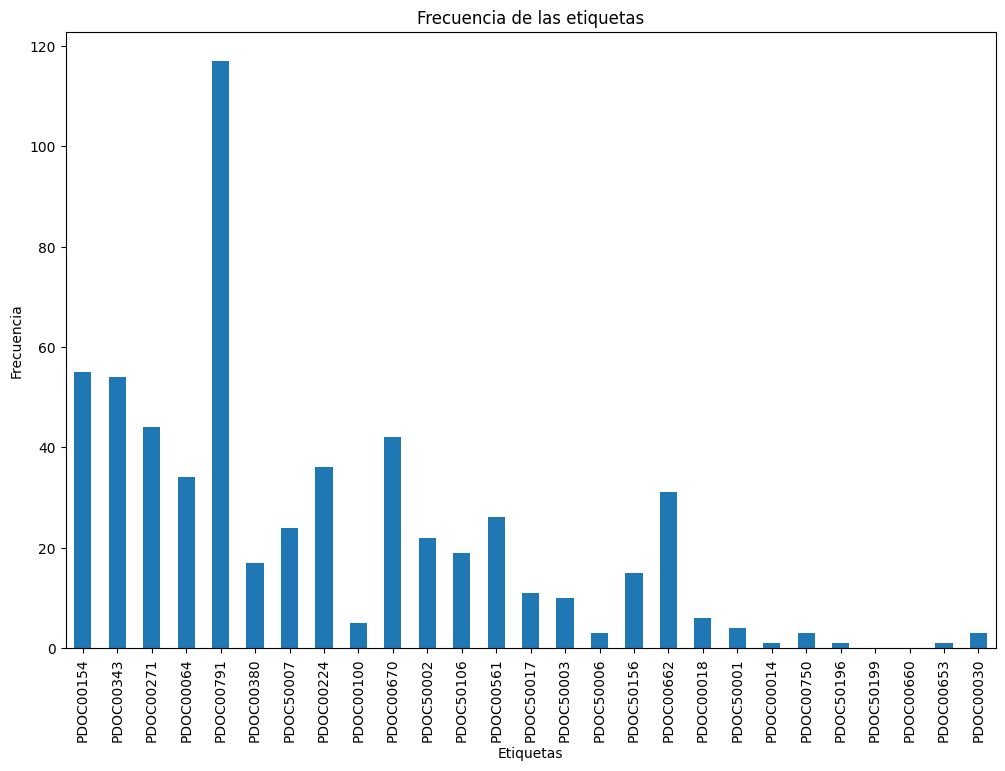

In [ ]:
import matplotlib.pyplot as plt

# Convertir etiquetas a valores enteros (0s y 1s) (esto es necesario por que las etiquetas son "YES" o "NO")
Y_train_int = Y_train.astype(int)
Y_test_int = Y_test.astype(int)

# Calcular la suma de las etiquetas para obtener la frecuencia de cada etiqueta
label_counts = Y_train_int.sum()

# Graficar el histograma de las etiquetas
plt.figure(figsize=(12, 8))
label_counts.plot(kind='bar')
plt.title('Frecuencia de las etiquetas')
plt.xlabel('Etiquetas')
plt.ylabel('Frecuencia')
plt.show()


#### Explicación de los datos
Al revisar los datos presentados anteriormente, notamos que los atributos están mayoritariamente compuestos por valores "NO", al igual que las etiquetas, que contienen principalmente el valor "0".

Además, no encontramos ninguna correlación clara entre los atributos ni entre las etiquetas.

## 2. Preprocesado

### Preparación de los datos
**Convertir el "NO" en 0 para los atributos (X).**

In [ ]:
def convert_yes_no_to_binary(df):
    df_copy = df.copy()  # Hacer una copia del DataFrame original
    df_copy.replace({b'YES': 1, b'NO': 0}, inplace=True)  # Modificar la copia
    return df_copy  # Devolver la copia modificada

X_train = convert_yes_no_to_binary(X_train)
X_test = convert_yes_no_to_binary(X_test)

num_ones_X_train = (X_train == 1).sum().sum()
print(f"El número total de 1s en X_train es: {num_ones_X_train}")


# Verificar tipos de datos después de la conversión
print(X_train.dtypes)
print(X_train)

El número total de 1s en X_train es: 1161
PS00010    int64
PS00011    int64
PS00012    int64
PS00014    int64
PS00017    int64
           ...  
PS50826    int64
PS50827    int64
PS50829    int64
PS50830    int64
PS60000    int64
Length: 1185, dtype: object
     PS00010  PS00011  PS00012  PS00014  PS00017  PS00018  PS00019  PS00020  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
458        0        0        0        0        0        0        0        0   
459        0        0        0        0        1        0        0        0   
460        0        0        0  

Nos aseguramos que todos los datos son enteros.


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Verificar tipos de datos
print(X_train.dtypes)

todos_float = all(X_train.dtypes == 'int')
print(f"\n¿Todos los datos son int64?: {todos_float}")

# Normalización/estandarización de características
scaler = StandardScaler()
X_train_scaled = np.array(scaler.fit_transform(X_train))
X_test_scaled = np.array(scaler.transform(X_test))

PS00010    int64
PS00011    int64
PS00012    int64
PS00014    int64
PS00017    int64
           ...  
PS50826    int64
PS50827    int64
PS50829    int64
PS50830    int64
PS60000    int64
Length: 1185, dtype: object

¿Todos los datos son int64?: True


In [ ]:
# Verificar tipos de datos después de la conversión
# Comparar igualdad
igualdad1 = np.array_equal(X_train, X_train_scaled)

print("X_train y X_train_scaled son iguales:", igualdad1)

X_train y X_train_scaled son iguales: False


**No normalizamos**
+ Al ser las características binarias normalizar o escalar los datos los dejara como estaban.

La función siguiente sirve par comprobar si hay una gran cantidad de atributos que tenga como valor medio y varianza 0.

In [ ]:
def filtrar_columnas_por_media_varianza(df):
    # Inicializar listas para almacenar resultados
    columnas_filtradas = []
    medias = []
    varianzas = []

    # Iterar sobre cada columna
    for col in df.columns:
        columna = df[col]
        media = np.mean(columna)
        varianza = np.var(columna)

        # Condiciones para filtrar
        if media > 0.99 or media < 0.001 or np.isclose(varianza, 0):
            columnas_filtradas.append(columna)
            medias.append(media)
            varianzas.append(varianza)
            print(f"Columna {col}: Media = {media}, Varianza = {varianza}")

    # Crear un DataFrame con las columnas filtradas
    df_columnas_filtradas = pd.DataFrame(columnas_filtradas).T  # Transponer para mantener el formato original

    return df_columnas_filtradas, np.array(medias), np.array(varianzas)

In [ ]:
columnas, media, varianza = filtrar_columnas_por_media_varianza(X_train)

Columna PS00010: Media = 0.0, Varianza = 0.0
Columna PS00011: Media = 0.0, Varianza = 0.0
Columna PS00012: Media = 0.0, Varianza = 0.0
Columna PS00019: Media = 0.0, Varianza = 0.0
Columna PS00020: Media = 0.0, Varianza = 0.0
Columna PS00021: Media = 0.0, Varianza = 0.0
Columna PS00022: Media = 0.0, Varianza = 0.0
Columna PS00023: Media = 0.0, Varianza = 0.0
Columna PS00024: Media = 0.0, Varianza = 0.0
Columna PS00025: Media = 0.0, Varianza = 0.0
Columna PS00026: Media = 0.0, Varianza = 0.0
Columna PS00027: Media = 0.0, Varianza = 0.0
Columna PS00032: Media = 0.0, Varianza = 0.0
Columna PS00033: Media = 0.0, Varianza = 0.0
Columna PS00034: Media = 0.0, Varianza = 0.0
Columna PS00035: Media = 0.0, Varianza = 0.0
Columna PS00045: Media = 0.0, Varianza = 0.0
Columna PS00046: Media = 0.0, Varianza = 0.0
Columna PS00047: Media = 0.0, Varianza = 0.0
Columna PS00048: Media = 0.0, Varianza = 0.0
Columna PS00049: Media = 0.0, Varianza = 0.0
Columna PS00050: Media = 0.0, Varianza = 0.0
Columna PS

In [ ]:
x_train = X_train.drop(columns=columnas)
x_test = X_test.drop(columns=columnas)
y_train = Y_train_int
y_test = Y_test_int

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(463, 99)
(199, 99)
(463, 27)
(199, 27)


In [ ]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

### Expliación de los datos procesados

Debido a la gran cantidad atributos con el valor de 0 en todos sus instacias los hemos quitado dando al final:

|Nº Atributos antes |Nº Atributos después | reducción%|
|-|-| |
|1185|99| 0.9164%|

##3. Experimentación con modelos de Aprendizaje

Mostrar curva de aprendizaje (redes neuronales)

In [ ]:
def mostrarEvolucion(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training loss', 'Validation loss'])
    plt.show()

    acc = hist.history['binary_accuracy']
    val_acc = hist.history['val_binary_accuracy']
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training accuracy','Validation accuracy'])
    plt.show()

Mostrar curva de aprendizaje (otros modelos)

In [ ]:
from sklearn.model_selection import learning_curve

def mostrarEvolucion2(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Esta función genera una curva de aprendizaje para un modelo dado.

    Parámetros:
    - estimator: el modelo a evaluar.
    - X: características de entrenamiento.
    - y: etiquetas de entrenamiento.
    - cv: validación cruzada (número de pliegues).
    - n_jobs: número de trabajos paralelos para ejecutar.
    - train_sizes: proporciones de entrenamiento a evaluar.
    """
    # Obtener las curvas de aprendizaje
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    # Calcular la media y desviación estándar de las puntuaciones
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Gráfico de la pérdida (en este caso usamos 1 - score como una aproximación a la pérdida)
    plt.figure(figsize=(12, 8))
    plt.fill_between(train_sizes, 1 - train_scores_mean + train_scores_std, 1 - train_scores_mean - train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, 1 - test_scores_mean + test_scores_std, 1 - test_scores_mean - test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, 1 - train_scores_mean, 'o-', color="r", label="Pérdida de entrenamiento")
    plt.plot(train_sizes, 1 - test_scores_mean, 'o-', color="g", label="Pérdida de validación")
    plt.title("Curva de Pérdida")
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("Pérdida")
    plt.legend(loc="best")
    plt.show()

    # Gráfico de precisión (accuracy)
    plt.figure(figsize=(12, 8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Precisión de entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Precisión de validación")
    plt.title("Curva de Precisión")
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("Precisión")
    plt.legend(loc="best")
    plt.show()


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def mostrar_matriz_confusion(y_test, y_pred, etiquetas=27):
    """
    Muestra la matriz de confusión para un conjunto de etiquetas.

    Parámetros:
    y_test: array-like de forma (n_samples, n_labels)
        Etiquetas verdaderas.
    y_pred: array-like de forma (n_samples, n_labels)
        Etiquetas predichas.
    etiquetas: int, opcional (por defecto=27)
        Número de etiquetas para mostrar.
    """
    # Crear matriz de confusión
    mcm = multilabel_confusion_matrix(y_test, y_pred)

    # Mostrar la matriz de confusión
    fig, axs = plt.subplots(3, 9, figsize=(20, 10))

    for i, ax in enumerate(axs.flat):
        if i < etiquetas:
            disp = ConfusionMatrixDisplay(mcm[i], display_labels=[0, 1])
            disp.plot(ax=ax)
            disp.ax_.set_title(f"Etiq. {i + 1}")
            disp.im_.colorbar.remove()

    plt.tight_layout()
    plt.show()

# Ejemplo de uso con diferentes modelos
# mostrar_matriz_confusion(y_test_modelo1, y_pred_modelo1)
# mostrar_matriz_confusion(y_test_modelo2, y_pred_modelo2)


In [ ]:
# Convertir las etiquetas de clase a un formato numérico adecuado
Y_train_numeric = Y_train.applymap(lambda x: int(x.decode('utf-8').replace("b'", "").replace("'", "")))
Y_test_numeric = Y_test.applymap(lambda x: int(x.decode('utf-8').replace("b'", "").replace("'", "")))

print(Y_train_numeric.head())


   PDOC00154  PDOC00343  PDOC00271  PDOC00064  PDOC00791  PDOC00380  \
0          0          0          0          0          0          0   
1          1          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          1          0   

   PDOC50007  PDOC00224  PDOC00100  PDOC00670  ...  PDOC00662  PDOC00018  \
0          0          0          0          1  ...          0          0   
1          0          0          0          0  ...          0          0   
2          0          1          0          0  ...          0          0   
3          1          0          0          0  ...          0          0   
4          0          0          0          0  ...          0          0   

   PDOC50001  PDOC00014  PDOC00750  PDOC50196  PDOC50199  PDOC00660  \
0          0          0          0          0

#### MultiOutputClassifier

MultiOutputClassifier es una clase en scikit-learn que permite adaptar un clasificador base para manejar problemas de clasificación multi-etiqueta. En un problema multi-etiqueta, cada instancia puede estar asociada con múltiples etiquetas simultáneamente.

El MultiOutputClassifier crea una copia independiente del clasificador base para cada etiqueta, lo que significa que entrena tantos clasificadores como etiquetas tenga el problema. Esto es útil porque permite aplicar cualquier clasificador de scikit-learn que esté diseñado para problemas de una sola etiqueta a problemas de múltiples etiquetas sin necesidad de modificar el clasificador base.


#### Evaluación de los modelos

Para evaluar los modelos hemos usado unas cuantas métricas como son:

Accuracy Score (Precisión)
Definición: Proporción de instancias correctamente clasificadas sobre el total de instancias.

Uso: Para medir cuántas predicciones fueron correctas en general, considerando todas las etiquetas.


F1 Score (Micro)
Definición: La media armónica entre la precisión y el recall (sensibilidad) calculados a nivel de cada etiqueta y luego promediados.

Uso: Especialmente útil cuando hay un desequilibrio entre clases. El F1 micro promedio considera el número total de verdaderos positivos, falsos negativos y falsos positivos a través de todas las etiquetas, proporcionando una métrica global del rendimiento.


Hamming Loss

Definición: Proporción de etiquetas incorrectamente predichas. Es la media de los errores en todas las etiquetas para cada instancia.

Uso: Útil para entender cuántas etiquetas se predijeron incorrectamente en promedio por instancia. Una Hamming Loss baja indica que el modelo está prediciendo correctamente la mayoría de las etiquetas.


#### K-Nearest Neighbors

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Mejores hiperparámetros encontrados:
{'estimator__metric': 'manhattan', 'estimator__n_neighbors': 3, 'estimator__weights': 'distance'}
Accuracy: 0.9799
F1 Score (micro): 0.9897
Hamming Loss: 0.0009


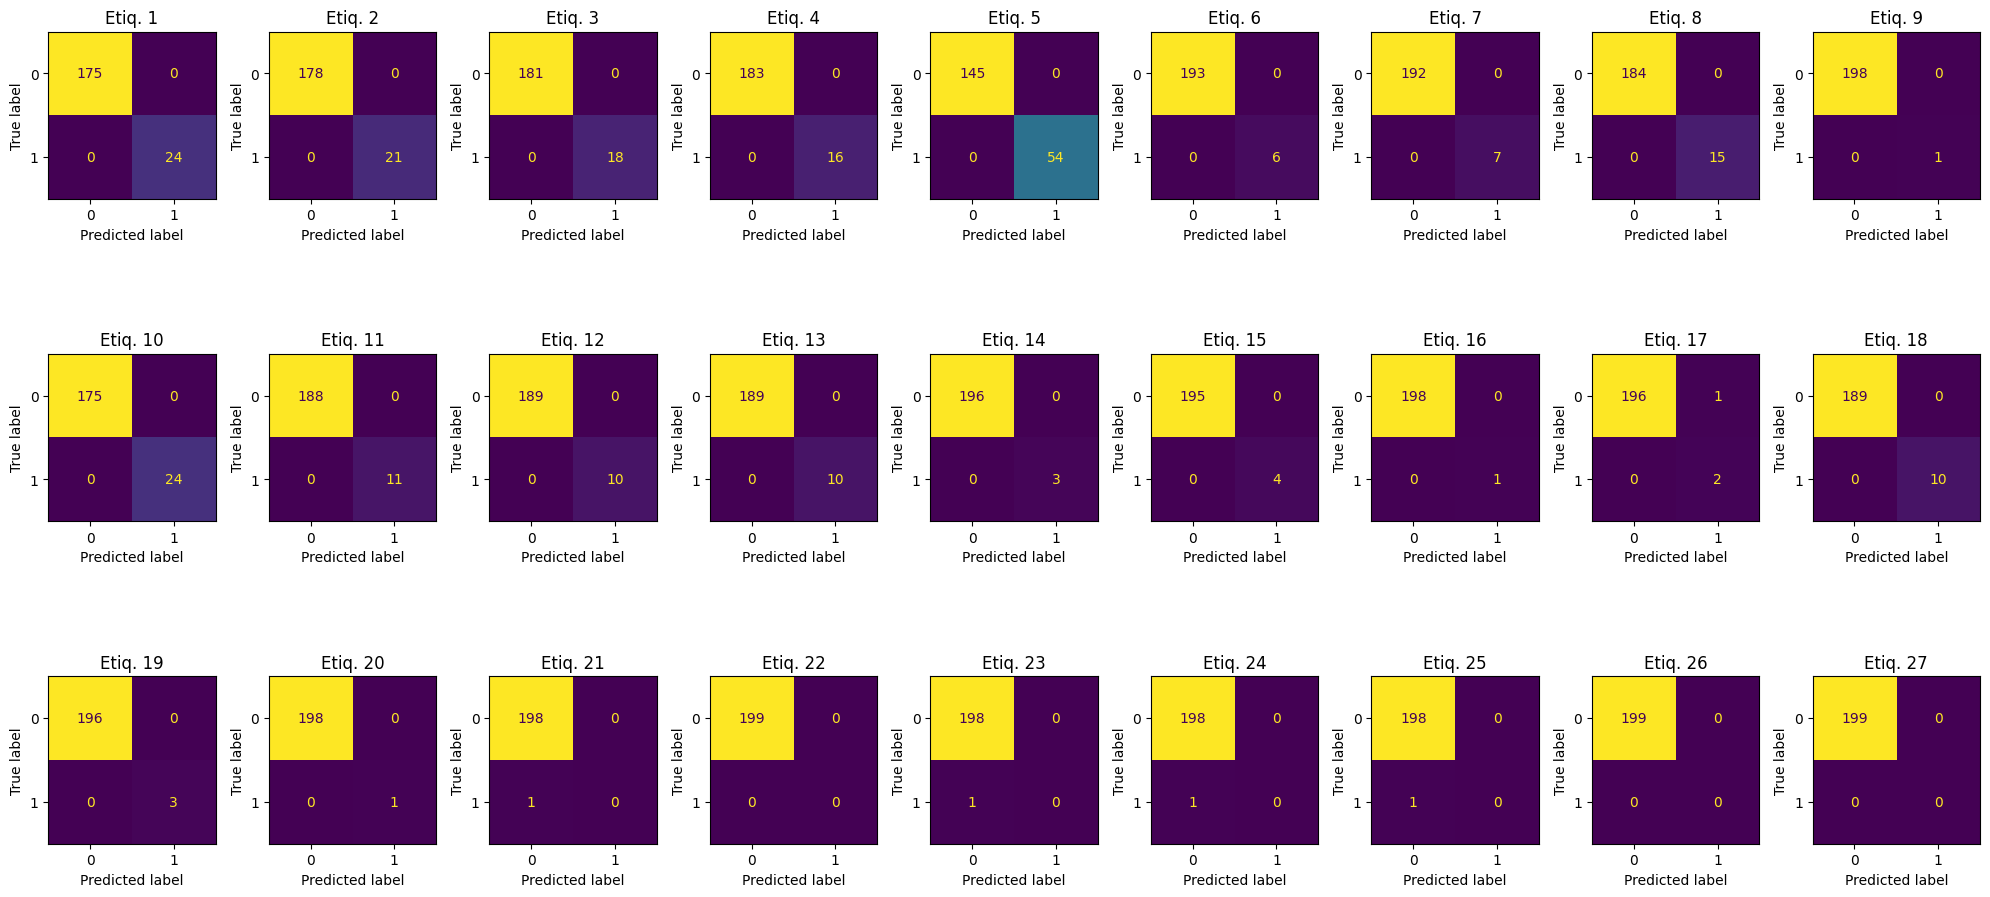

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, f1_score, hamming_loss
from sklearn.model_selection import GridSearchCV

# Crear el clasificador KNN
knn = KNeighborsClassifier()

# Envolver el clasificador KNN en un MultiOutputClassifier
multi_target_knn = MultiOutputClassifier(knn, n_jobs=-1)

# Definir los hiperparámetros que quieres probar
param_grid = {
    'estimator__n_neighbors': [3, 5, 7, 10],
    'estimator__weights': ['uniform', 'distance'],
    'estimator__metric': ['euclidean', 'manhattan']
}

# Crear el GridSearchCV
grid_search = GridSearchCV(multi_target_knn, param_grid, cv=3, scoring='f1_micro', n_jobs=-1, verbose=2)

# Ajustar el GridSearchCV
grid_search.fit(x_train, y_train)

# Mostrar los mejores parámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Utilizar el mejor modelo encontrado para hacer predicciones
best_model_knn = grid_search.best_estimator_
y_pred = best_model_knn.predict(x_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
hamming = hamming_loss(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (micro): {f1:.4f}")
print(f"Hamming Loss: {hamming:.4f}")

# Mostrar la matriz de confusión para las etiquetas
mostrar_matriz_confusion(y_test, y_pred, etiquetas=27)


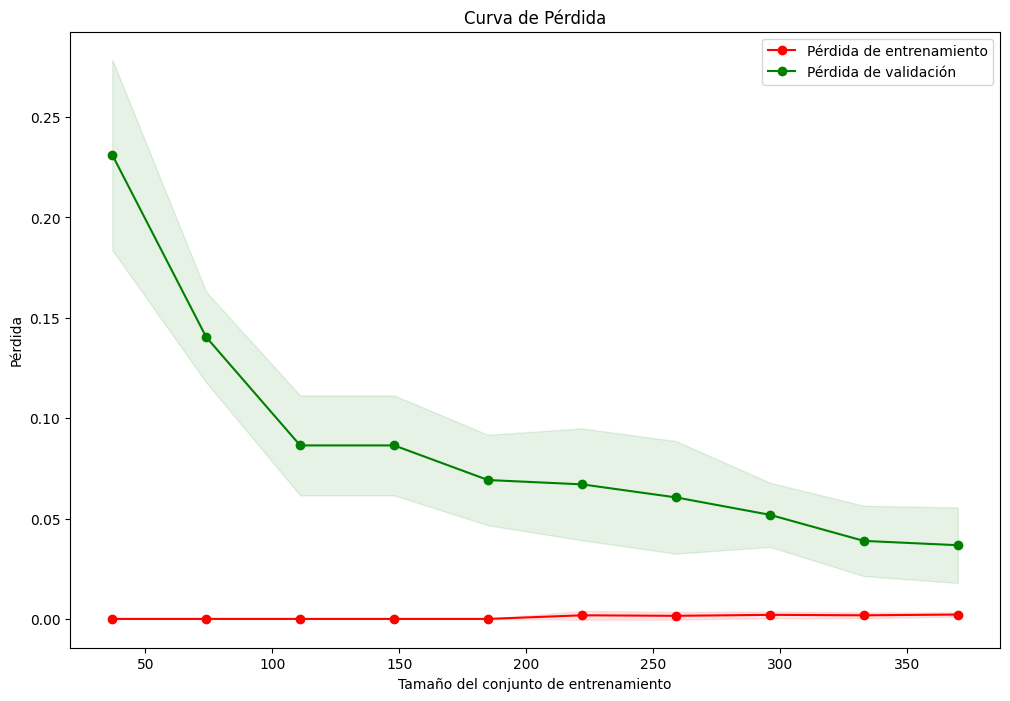

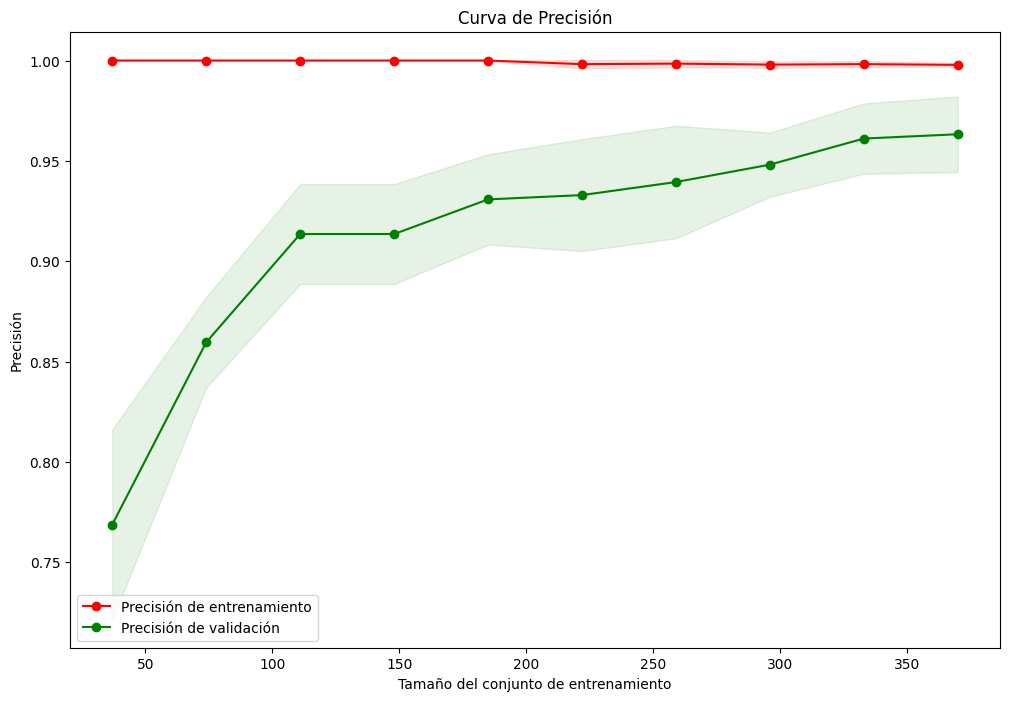

In [ ]:
mostrarEvolucion2(best_model_knn, x_train, y_train)

#### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, hamming_loss, classification_report, make_scorer

# Definir el clasificador XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Definir los parámetros que quieres probar
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Definir la métrica a optimizar (Hamming Loss en este caso)
scorer = make_scorer(hamming_loss, greater_is_better=False)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring=scorer,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener el mejor modelo encontrado
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo con los datos de prueba
y_pred = best_model.predict(x_test)

# Calcular y mostrar métricas de evaluación
hamming = hamming_loss(y_test, y_pred)
print(f"Hamming Loss: {hamming:.4f}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Mejores hiperparámetros encontrados:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Hamming Loss: 0.0011


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, hamming_loss, classification_report, make_scorer

xgb_model = xgb.XGBClassifier(colsample_bytree = 0.8, gamma = 0, learning_rate = 0.1, max_depth =  3, n_estimators = 100, subsample = 0.8,objective='binary:logistic', random_state=42)

xgb_multi = MultiOutputClassifier(xgb_model, n_jobs=-1)

# Ajustar el modelo a los datos de entrenamiento
xgb_multi.fit(x_train, y_train)

# Predecir con el conjunto de prueba
y_pred = xgb_multi.predict(x_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
f1_micro = f1_score(y_test, y_pred, average='micro')
hamming = hamming_loss(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (micro): {f1_micro:.4f}")
print(f"Hamming Loss: {hamming:.4f}")

Accuracy: 0.9698
F1 Score (micro): 0.9856
Hamming Loss: 0.0013


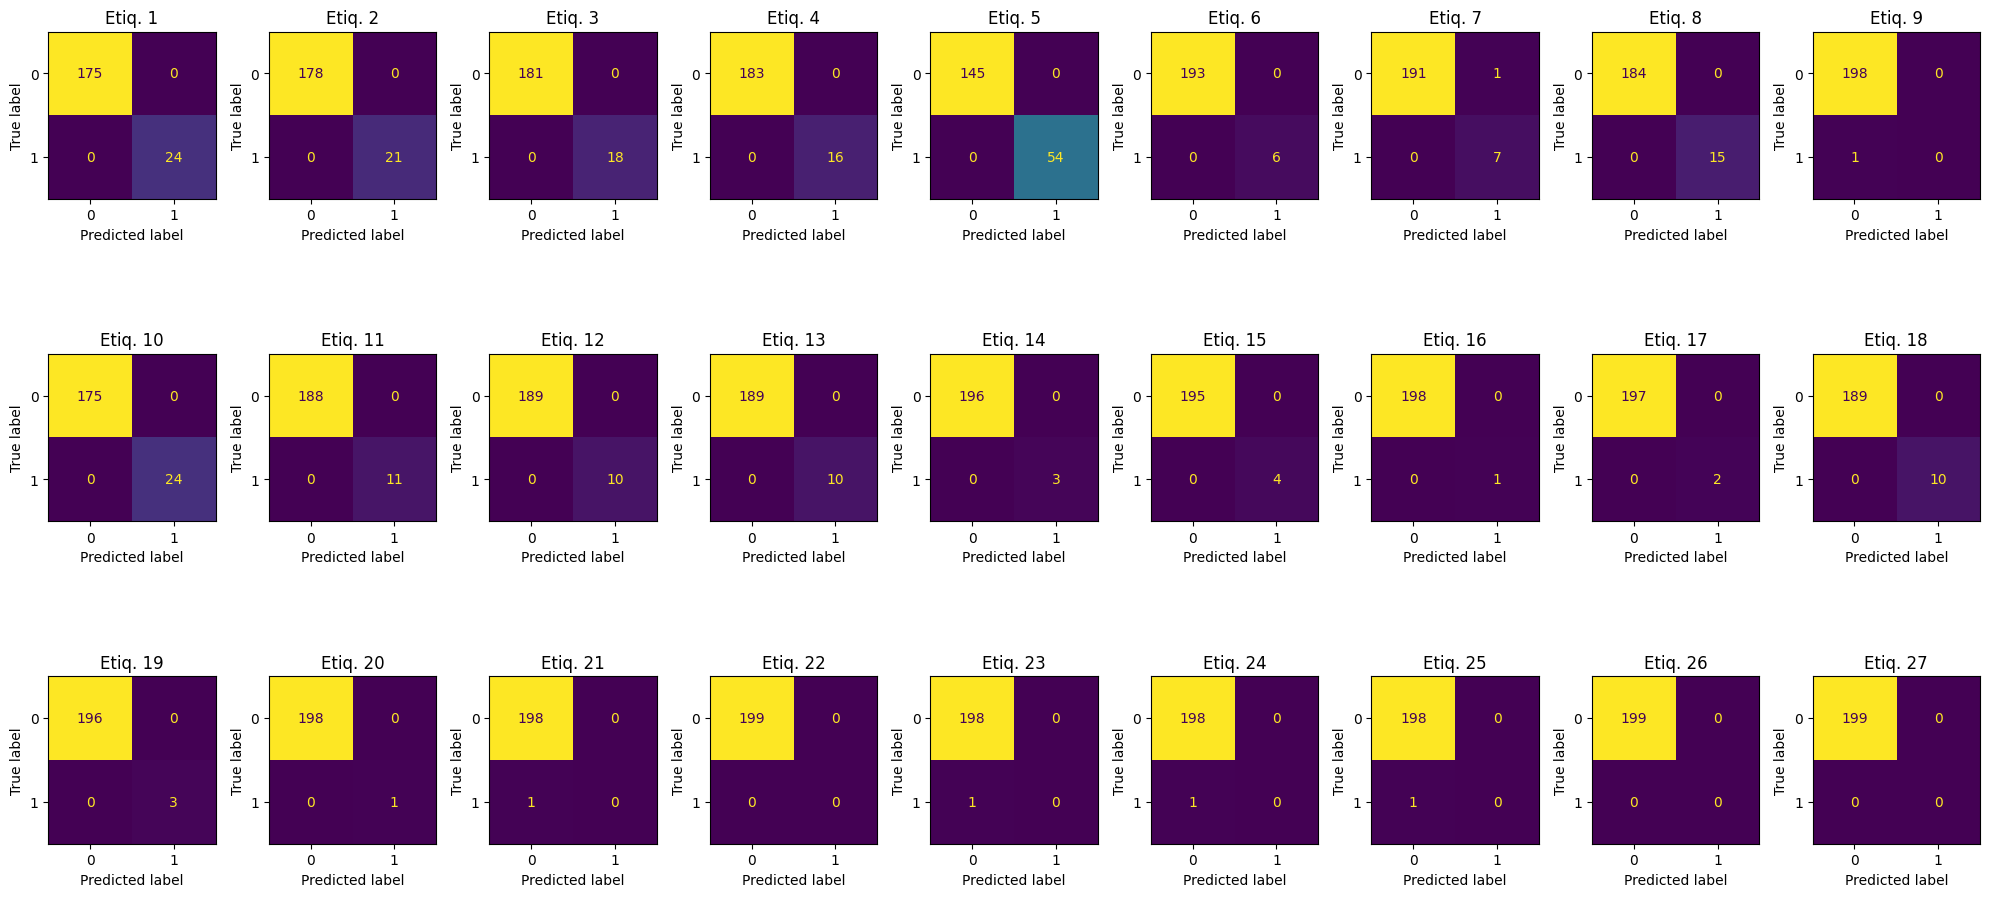

In [ ]:
mostrar_matriz_confusion(y_test, y_pred, etiquetas=27)

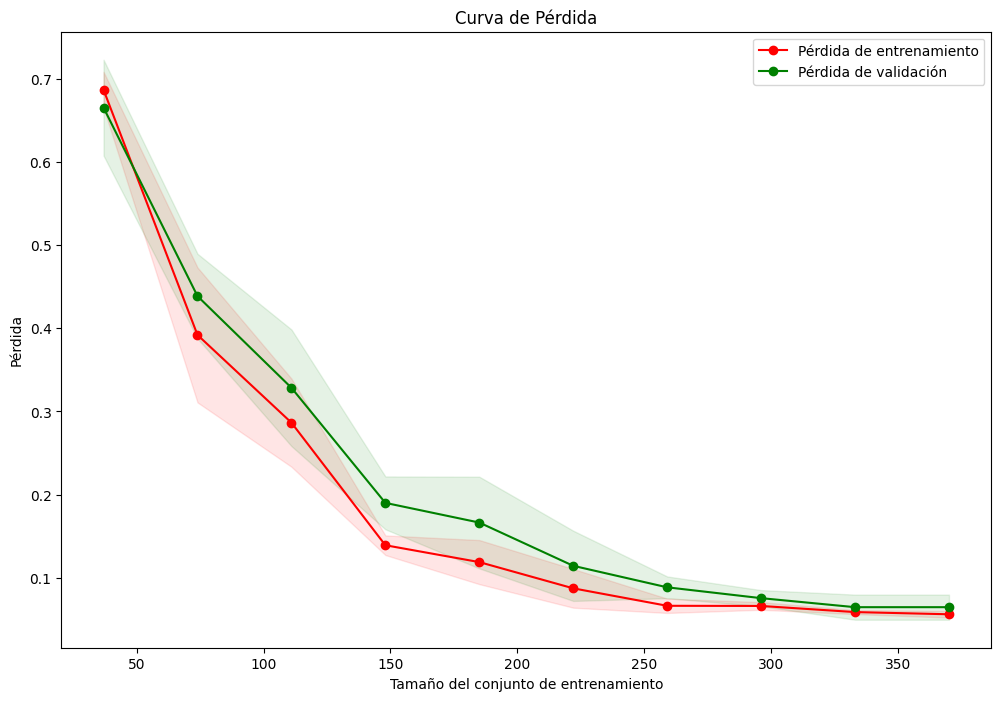

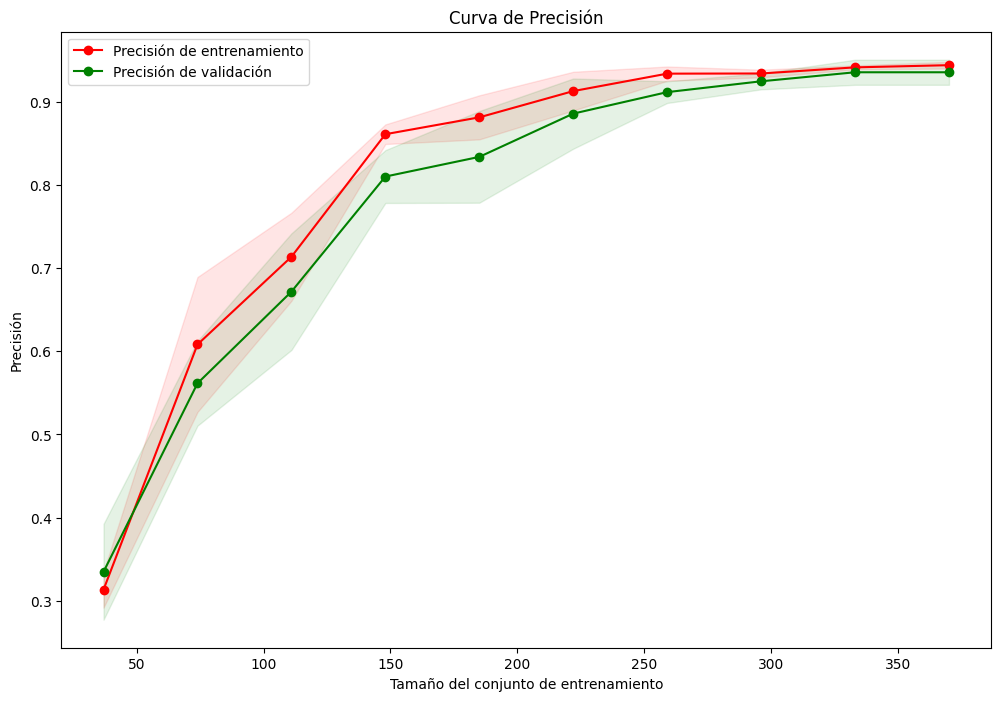

In [ ]:
mostrarEvolucion2(xgb_multi, x_train, y_train)

#### Random Forest

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=100; total time=  12.8s
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=100; total time=   4.9s
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=100; total time=   5.9s
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=150; total time=   8.3s
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=150; total time=   8.1s
[CV] END estimator__max_depth=None, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=150; total time=   6.2s
[CV] END estimator__max_depth=None, estimator__min_sample

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


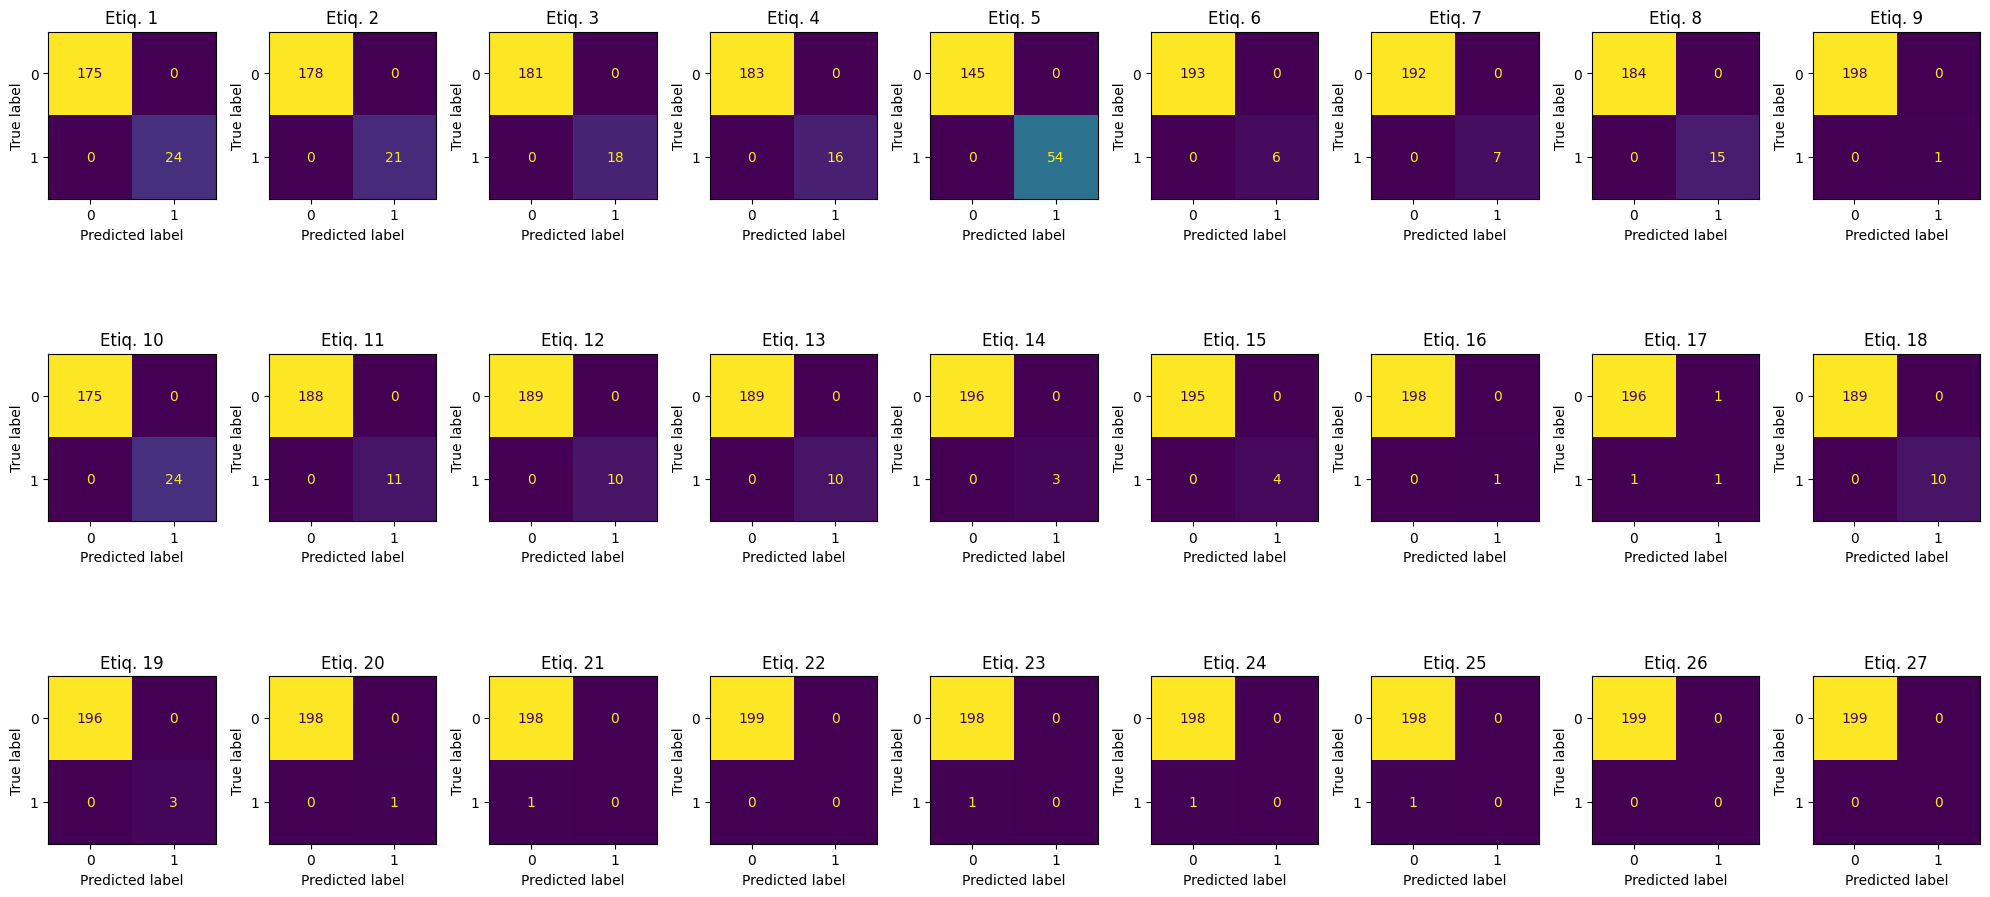

In [ ]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report

# Definir los parámetros para Grid Search
parametros_grid = {
    'estimator__n_estimators': [100, 150],
    'estimator__max_depth': [None, 10],
    'estimator__min_samples_split': [2, 4],
    'estimator__min_samples_leaf': [1, 2]
}

# Crear una instancia del clasificador Random Forest
clasificador_rf = RandomForestClassifier(random_state=42)

# Crear una instancia del clasificador multi-etiqueta utilizando el enfoque One-vs-Rest (OvR)
modelo_rf_multietiqueta = MultiOutputClassifier(clasificador_rf)

# Crear una instancia del Grid Search
grid_search = GridSearchCV(modelo_rf_multietiqueta, parametros_grid, cv=3, verbose=2)

# Entrenar el Grid Search
grid_search.fit(x_train, y_train)

# Obtener los mejores hiperparámetros encontrados
mejores_parametros = grid_search.best_params_
print("Mejores hiperparámetros encontrados:")
print(mejores_parametros)

# Obtener el mejor modelo
mejor_modelo = grid_search.best_estimator_

# Predecir en el conjunto de prueba con el mejor modelo
predicciones_test_mejor_modelo = mejor_modelo.predict(x_test)

# Evaluar el rendimiento del mejor modelo
precision_test_mejor_modelo = accuracy_score(y_test, predicciones_test_mejor_modelo)
print("Precisión en el conjunto de prueba del mejor modelo:", precision_test_mejor_modelo)

# Informe de clasificación en el conjunto de prueba
print("Informe de clasificación en el conjunto de prueba:")
print(classification_report(y_test, predicciones_test_mejor_modelo))

# Mostrar la matriz de confusión para las etiquetas
mostrar_matriz_confusion(y_test, predicciones_test_mejor_modelo, etiquetas=27)


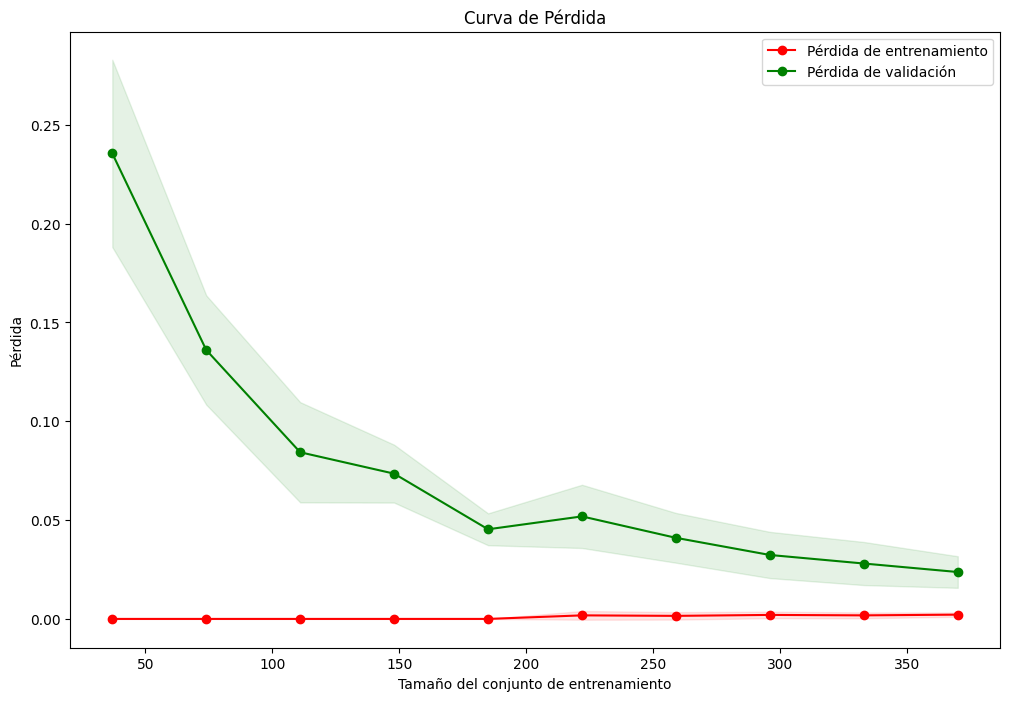

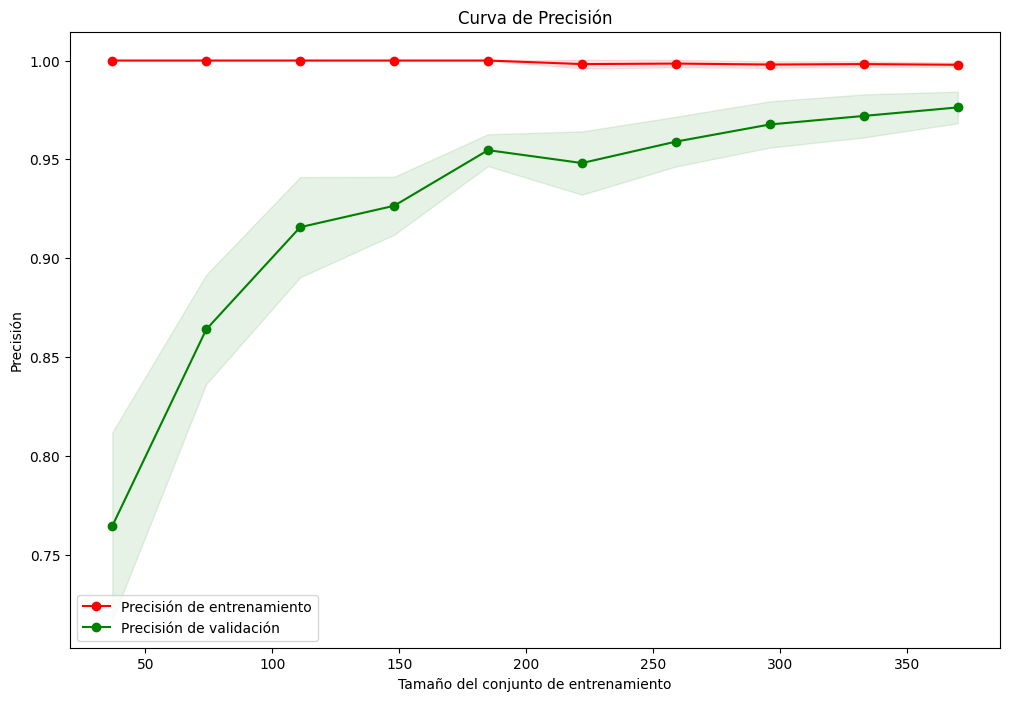

In [ ]:
mostrarEvolucion2(mejor_modelo, x_train, y_train)

####Red neuronal

- **Activación Sigmoide**: Se usa en la salida de un modelo de clasificación multietiqueta porque convierte cada salida en una probabilidad independiente de pertenencia a cada clase. Esto es crucial para problemas multietiqueta donde cada clase puede ser presente o ausente independientemente de las otras.

- **`binary_crossentropy`**: Se utiliza como función de pérdida porque mide la diferencia entre las distribuciones de probabilidad previstas y las reales para cada etiqueta de forma independiente. En problemas multietiqueta, cada etiqueta se trata como una tarea binaria, y `binary_crossentropy` es adecuada para optimizar la probabilidad de predicción correcta para cada etiqueta individualmente.

- **`binary_accuracy`**: Se usa como métrica porque evalúa la precisión de cada etiqueta de forma independiente, proporcionando una medida clara de la performance del modelo en cada una de las etiquetas de la clasificación multietiqueta. Esto ayuda a entender qué tan bien el modelo está prediciendo cada etiqueta específica.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers


def build_model(input_shape):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(27, activation='sigmoid')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['binary_accuracy'])

    return model

In [ ]:
model = build_model(x_train.shape[1])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               12800     
                                                                 
 batch_normalization_4 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_5 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 128)              

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
x_tra, x_val, y_tra, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

In [ ]:
H = model.fit(x_tra, y_tra, validation_data=(x_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping, reduce_lr])

Epoch 1/100
12/12 [==============================] - 2s 26ms/step - loss: 0.8621 - binary_accuracy: 0.5326 - val_loss: 0.6735 - val_binary_accuracy: 0.7340 - lr: 0.0010
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7688 - binary_accuracy: 0.5704 - val_loss: 0.6572 - val_binary_accuracy: 0.7710 - lr: 0.0010
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7139 - binary_accuracy: 0.6041 - val_loss: 0.6393 - val_binary_accuracy: 0.7810 - lr: 0.0010
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6719 - binary_accuracy: 0.6283 - val_loss: 0.6199 - val_binary_accuracy: 0.7949 - lr: 0.0010
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6305 - binary_accuracy: 0.6524 - val_loss: 0.5973 - val_binary_accuracy: 0.8160 - lr: 0.0010
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.5875 - binary_accuracy: 0.6932 - val_loss: 0.5680 - val_binary_accuracy: 0.8491 - lr

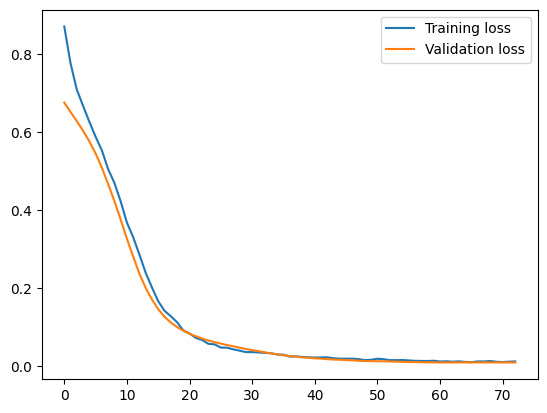

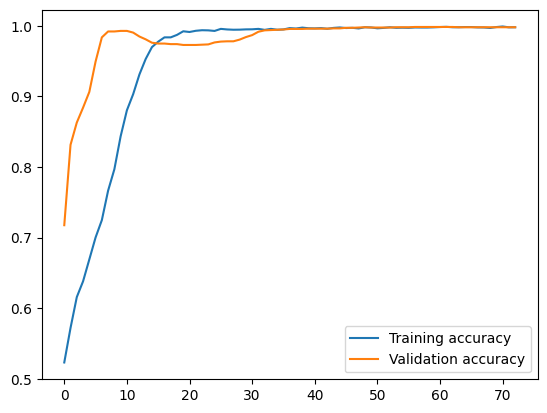

In [ ]:
mostrarEvolucion(H)

In [ ]:
from keras.metrics import BinaryAccuracy

# Evaluar el modelo
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Pérdida del modelo: {loss}")
print(f"Exactitud del modelo: {accuracy}")

7/7 [==============================] - 0s 4ms/step - loss: 0.0080 - binary_accuracy: 0.9991
Pérdida del modelo: 0.007967510260641575
Exactitud del modelo: 0.9990694522857666


In [ ]:
# Predecir etiquetas
y_pred = model.predict(x_test)

# Convertir las predicciones a valores enteros
y_pred_int = np.round(y_pred)

# Calcular la exactitud
exactitud = np.mean(y_pred_int == y_test)
print(f"Exactitud binaria de las predicciones: {exactitud}")

# Calcular la exactitud con la función de Keras
exactitud_keras = BinaryAccuracy()
exactitud_keras.update_state(y_test, y_pred)
print(f"Exactitud binaria de las predicciones (Keras): {exactitud_keras.result().numpy()}")

7/7 [==============================] - 0s 3ms/step
Exactitud binaria de las predicciones: 0.999069421179974
Exactitud binaria de las predicciones (Keras): 0.9990693926811218


In [ ]:
from sklearn.metrics import accuracy_score, hamming_loss

# Calcular exactitud y pérdida de Hamming con Scikit-learn
exactitud_sklearn = accuracy_score(y_test, y_pred_int)
hamming_sklearn = hamming_loss(y_test, y_pred_int)

print(f"Exactitud de las predicciones: {exactitud_sklearn}")
print(f"Pérdida de Hamming: {hamming_sklearn}")

Exactitud de las predicciones: 0.9798994974874372
Pérdida de Hamming: 0.0009305788200260562


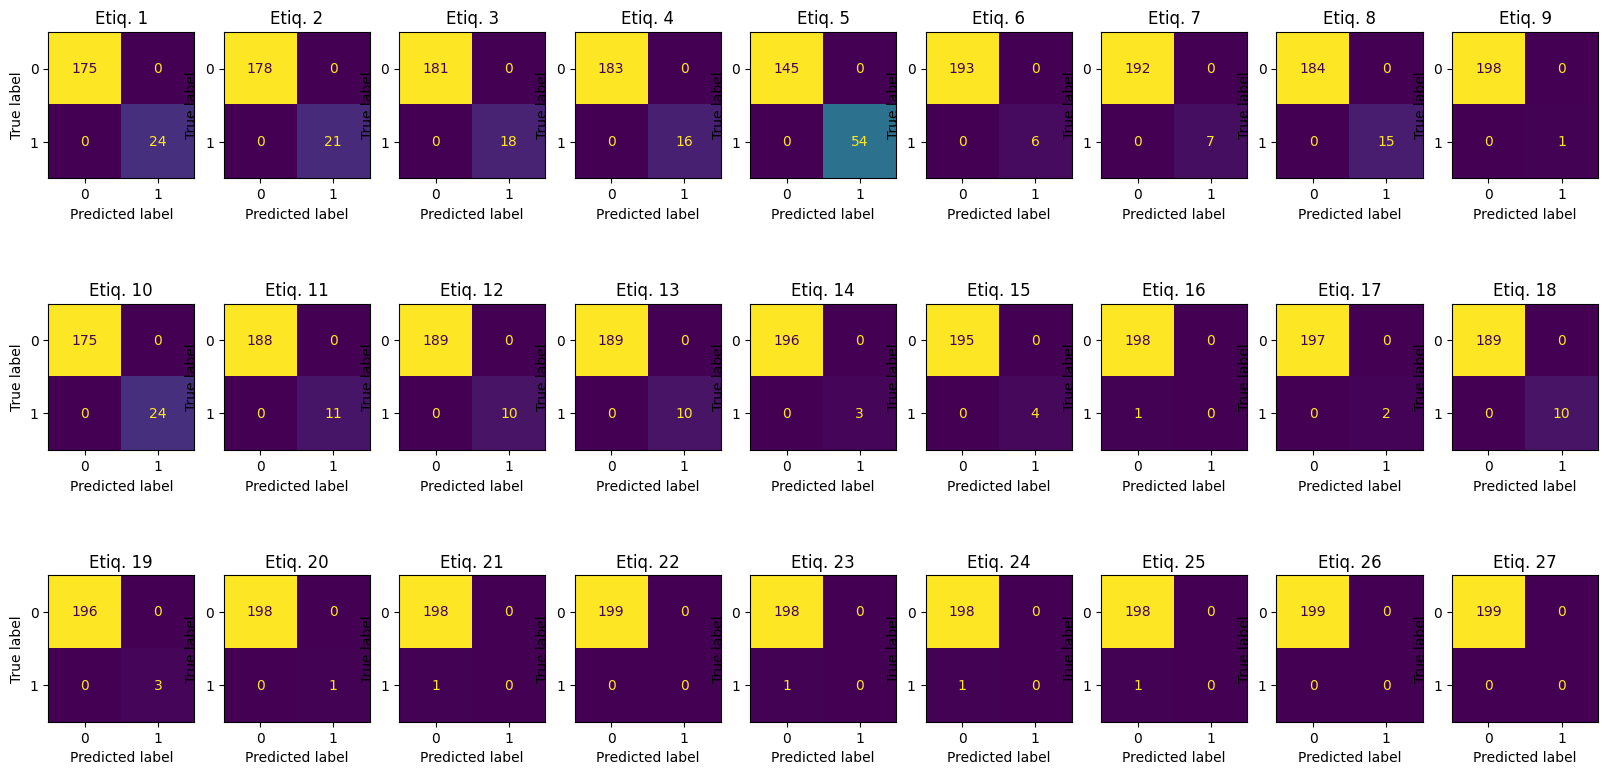

In [ ]:
# Matriz de confusión para las 27 etiquetas

from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

# Crear matriz de confusión
mcm = multilabel_confusion_matrix(y_test, y_pred_int)

# Mostrar la matriz de confusión
fig, axs = plt.subplots(3, 9, figsize=(20, 10))

for i, ax in enumerate(axs.flat):
    if i < 27:
        disp = ConfusionMatrixDisplay(mcm[i], display_labels=[0, 1])
        disp.plot(ax=ax)
        disp.ax_.set_title(f"Etiq. {i + 1}")
        disp.im_.colorbar.remove()

###Conclusiones


Tras el estudio de los datos, su procesamiento y experimentación con diferentes modelos, podemos sacar las siguientes conclusiones.
Se ha explorado el conjunto de datos Genbase observando que:
1. Estamos ante un problema multietiqueta con 27 clases posibles por instancia.
2. Se observó que las características eran binarias, inicialmente dadas como 'YES' or 'NO' y se transformaron a 0 y 1. Gracias a esto, no fue necesaria la normalización.
3. Inicialmente, la dimensión del problema era especialmente grande contando con más de 1000 características. Sin embargo, gracias al estudio hecho se observó que la gran mayoría de ellas eran irrelevantes ya que tenían varianza 0 y el número de características se redujo a 99.
4. El número de instancias era de 662 así que, en general, el conjunto de datos acabó siendo relativamente pequeño.
5. Se experimentó con los modelos K-nn, XGBoost, Random Forest y una Red Neuronal básica. Con todas ellas se consiguió saturar el conjunto de datos con precisiones de cerca del 98%. Con esto podemos, asegurar que la convergencia se está dando por la naturaleza de los datos
6. En cocnlusión, se ha resuelto de manera satisfactoria el problema de
clasificación multi-etiqueta de funciones de proteínas.


Video:
[Video
](https://drive.google.com/file/d/1a3SjTuXZG3RwFmXvPWa00-LkQfaj5IPS/view?usp=sharing
)